In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from automata.configs.config_enums import ConfigCategory
from automata.tools.search.symbol_converter import SymbolConverter
from automata.tools.search.symbol_graph import SymbolGraph
from automata.tools.search.symbol_rank.symbol_embedding_map import SymbolEmbeddingMap
from automata.tools.search.symbol_rank.symbol_similarity import SymbolSimilarity

In [2]:
file_dir = os.getcwd()

scip_path = os.path.join(
    file_dir, "..", "configs", ConfigCategory.SYMBOLS.value, "index.scip"
)
embedding_path = os.path.join(
    file_dir, "..", "configs", ConfigCategory.SYMBOLS.value, "symbol_embedding.json"
)

In [3]:
symbol_converter = SymbolConverter()
symbol_graph = SymbolGraph(scip_path, symbol_converter)
symbol_embedding = SymbolEmbeddingMap(
    load_embedding_map=True,
    embedding_path=embedding_path,
)
symbol_similarity = SymbolSimilarity(symbol_embedding)

In [4]:
prefix = 'scip-python python automata 4d57f302bbe1f8b007a4007033d6e3f16b8c1d43'
for symbol in symbol_similarity.symbol_to_index:
    
    print("Including Symbol >> ", symbol.uri.replace(prefix, '').strip())

Including Symbol >>  `automata.cli.cli_utils`/check_kwargs().
Including Symbol >>  `automata.cli.cli_utils`/create_config_from_kwargs().
Including Symbol >>  `automata.cli.cli_utils`/create_instructions_and_config_from_kwargs().
Including Symbol >>  `automata.cli.cli_utils`/reconfigure_logging().
Including Symbol >>  `automata.cli.click_commands`/cli().
Including Symbol >>  `automata.cli.click_commands`/evaluator().
Including Symbol >>  `automata.cli.click_commands`/get_conversation().
Including Symbol >>  `automata.cli.click_commands`/initialize_task().
Including Symbol >>  `automata.cli.click_commands`/run_pending_task().
Including Symbol >>  `automata.cli.click_options`/common_options().
Including Symbol >>  `automata.cli.scripts.run_coordinator`/main().
Including Symbol >>  `automata.cli.scripts.run_coordinator`/run().
Including Symbol >>  `automata.cli.scripts.run_evaluator`/evaluator_decoder().
Including Symbol >>  `automata.cli.scripts.run_evaluator`/main().
Including Symbol >> 

In [5]:
similarity_matrix = symbol_similarity.generate_similarity_matrix()

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import pandas as pd

def plot_similarity_heatmap(similarity_df, n=20, figsize=(10,8), cmap='viridis', do_log=False):
    """
    Plots a heatmap of the similarity matrix.

    Args:
        similarity_object (SymbolSimilarity): SymbolSimilarity object.
        n (int): Label every nth symbol on the axes.
        figsize (tuple): Figure size.
        cmap (str): Color map.
    """

    # Generate the similarity matrix and create the DataFrame

    # Get the symbols and create labels for every nth symbol
    symbols = [symbol.uri.split('/')[1] for symbol in symbol_similarity.index_to_symbol.values()]
    symbols = [symbol.split("#")[0] for symbol in symbols]
    labels = ['' if i % n != 0 else symbol for i, symbol in enumerate(symbols)]

    # Note that you should add a small constant to avoid log(0)

    # Create the heatmap
    plt.figure(figsize=figsize)

    # Plot the heatmap
    if do_log:
        df_log_norm = LogNorm(vmin=similarity_df.min().min()+0.01, vmax=similarity_df.max().max())
        sns.heatmap(similarity_df, cmap=cmap, xticklabels=labels, yticklabels=labels, norm=df_log_norm)
    else:
        sns.heatmap(similarity_df, cmap=cmap, xticklabels=labels, yticklabels=labels)


    # Optional: Rotate the x-axis labels if they overlap
    plt.xticks(rotation=90)

    plt.show()


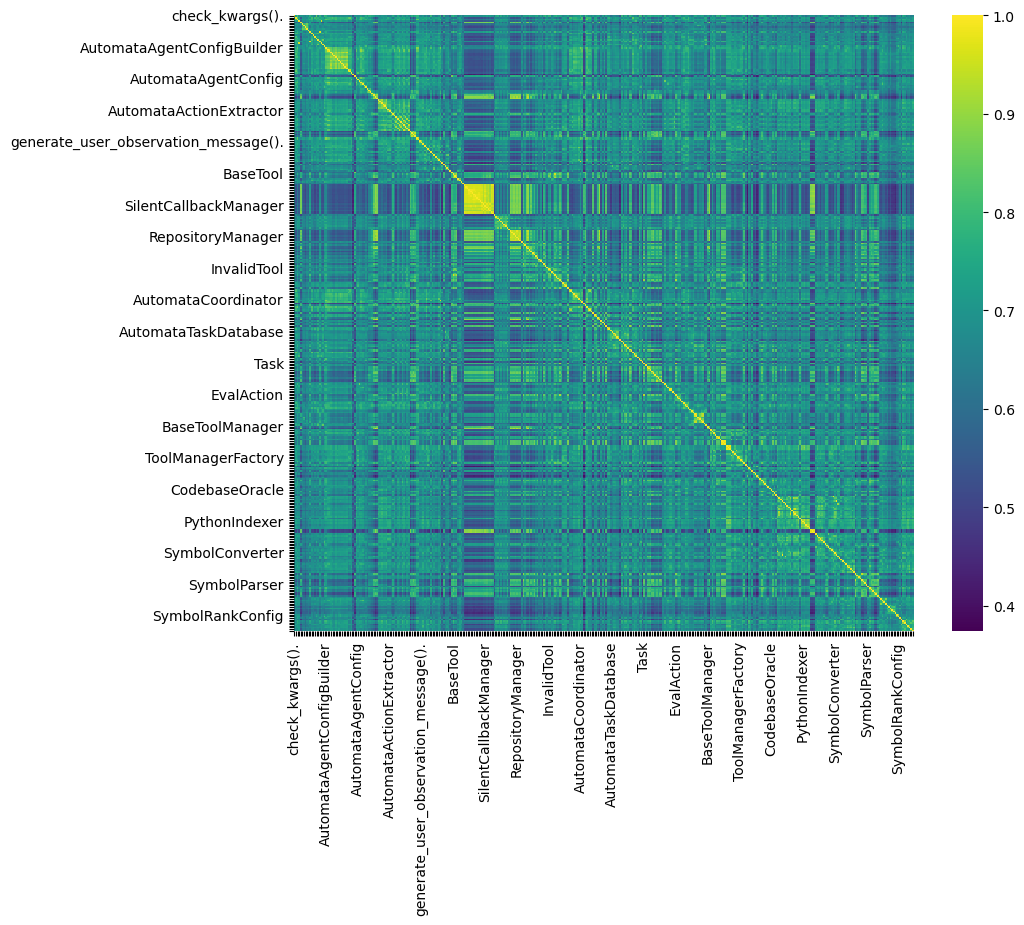

In [7]:
similarity_matrix = symbol_similarity.generate_similarity_matrix(norm_type="l2")
similarity_df = pd.DataFrame(similarity_matrix)
plot_similarity_heatmap(similarity_df)

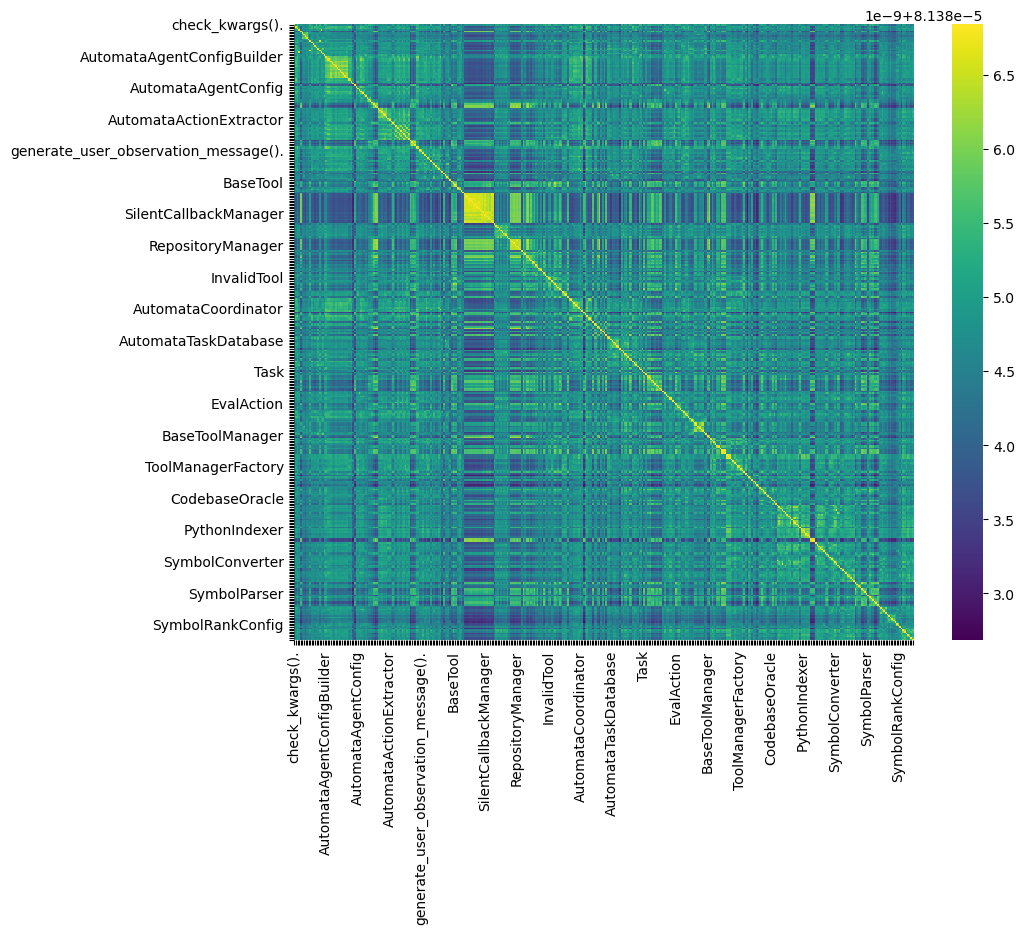

In [8]:
softmax_similarity_matrix = symbol_similarity.generate_similarity_matrix(norm_type="softmax")
softmax_similarity_df = pd.DataFrame(softmax_similarity_matrix)
plot_similarity_heatmap(softmax_similarity_df)

In [9]:
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
0,1.000000,0.716381,0.820683,0.696172,0.706069,0.715269,0.682340,0.650519,0.707821,0.674491,...,0.719573,0.716337,0.576327,0.755031,0.723995,0.635234,0.668188,0.696589,0.637994,0.660481
1,0.716381,1.000000,0.837880,0.742657,0.542899,0.702961,0.682361,0.685586,0.667454,0.741841,...,0.695730,0.671300,0.698088,0.686112,0.681829,0.739186,0.687625,0.696708,0.683880,0.724625
2,0.820683,0.837880,1.000000,0.743595,0.634946,0.720849,0.710808,0.682503,0.717448,0.727047,...,0.733880,0.751353,0.643314,0.768814,0.758312,0.707275,0.726502,0.741408,0.678316,0.724410
3,0.696172,0.742657,0.743595,1.000000,0.569261,0.685546,0.680657,0.659634,0.698271,0.682174,...,0.727884,0.706097,0.645958,0.718798,0.727809,0.692716,0.706175,0.720204,0.718806,0.729355
4,0.706069,0.542899,0.634946,0.569261,1.000000,0.689577,0.627732,0.595914,0.678397,0.582935,...,0.563116,0.637384,0.466273,0.659702,0.629674,0.510730,0.572653,0.593447,0.536307,0.552806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.635234,0.739186,0.707275,0.692716,0.510730,0.633493,0.625728,0.619095,0.638385,0.690744,...,0.711029,0.651062,0.851390,0.724656,0.731755,1.000000,0.746974,0.764478,0.737710,0.755861
386,0.668188,0.687625,0.726502,0.706175,0.572653,0.632866,0.647196,0.589140,0.637641,0.636484,...,0.675835,0.714689,0.744870,0.789350,0.779534,0.746974,1.000000,0.841370,0.726467,0.760753
387,0.696589,0.696708,0.741408,0.720204,0.593447,0.674828,0.675752,0.628832,0.681548,0.661196,...,0.689670,0.737113,0.732370,0.820195,0.779978,0.764478,0.841370,1.000000,0.732708,0.783498
388,0.637994,0.683880,0.678316,0.718806,0.536307,0.634330,0.643809,0.610214,0.646913,0.668564,...,0.669121,0.686491,0.731848,0.756139,0.829203,0.737710,0.726467,0.732708,1.000000,0.813246


In [10]:
transformed_similarity_matrix = symbol_similarity.transform_similarity_matrix(similarity_matrix, "AutomataAgentConfigBuilder")
transformed_similarity_df = pd.DataFrame(transformed_similarity_matrix)
transformed_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
0,0.004484,0.002788,0.003599,0.002582,0.003569,0.002811,0.002622,0.002287,0.002602,0.002508,...,0.002626,0.002838,0.001789,0.003077,0.002790,0.002017,0.002349,0.002602,0.002134,0.002387
1,0.002788,0.003377,0.003189,0.002390,0.002382,0.002398,0.002276,0.002092,0.002129,0.002394,...,0.002204,0.002308,0.001881,0.002426,0.002280,0.002037,0.002098,0.002259,0.001985,0.002273
2,0.003599,0.003189,0.004288,0.002697,0.003139,0.002771,0.002672,0.002346,0.002579,0.002644,...,0.002619,0.002911,0.001953,0.003064,0.002857,0.002196,0.002498,0.002709,0.002219,0.002560
3,0.002582,0.002390,0.002697,0.003067,0.002380,0.002228,0.002163,0.001918,0.002122,0.002098,...,0.002197,0.002313,0.001659,0.002422,0.002319,0.001819,0.002053,0.002225,0.001988,0.002180
4,0.003569,0.002382,0.003139,0.002380,0.005698,0.003055,0.002720,0.002362,0.002811,0.002444,...,0.002317,0.002846,0.001632,0.003030,0.002735,0.001828,0.002270,0.002499,0.002022,0.002252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.002017,0.002037,0.002196,0.001819,0.001828,0.001763,0.001703,0.001541,0.001661,0.001819,...,0.001838,0.001826,0.001872,0.002091,0.001996,0.002248,0.001860,0.002022,0.001747,0.001934
386,0.002349,0.002098,0.002498,0.002053,0.002270,0.001950,0.001950,0.001624,0.001838,0.001856,...,0.001934,0.002220,0.001813,0.002522,0.002355,0.001860,0.002757,0.002464,0.001905,0.002156
387,0.002602,0.002259,0.002709,0.002225,0.002499,0.002210,0.002164,0.001842,0.002087,0.002049,...,0.002097,0.002433,0.001894,0.002784,0.002504,0.002022,0.002464,0.003112,0.002042,0.002359
388,0.002134,0.001985,0.002219,0.001988,0.002022,0.001860,0.001846,0.001600,0.001774,0.001855,...,0.001822,0.002029,0.001695,0.002298,0.002383,0.001747,0.001905,0.002042,0.002495,0.002192


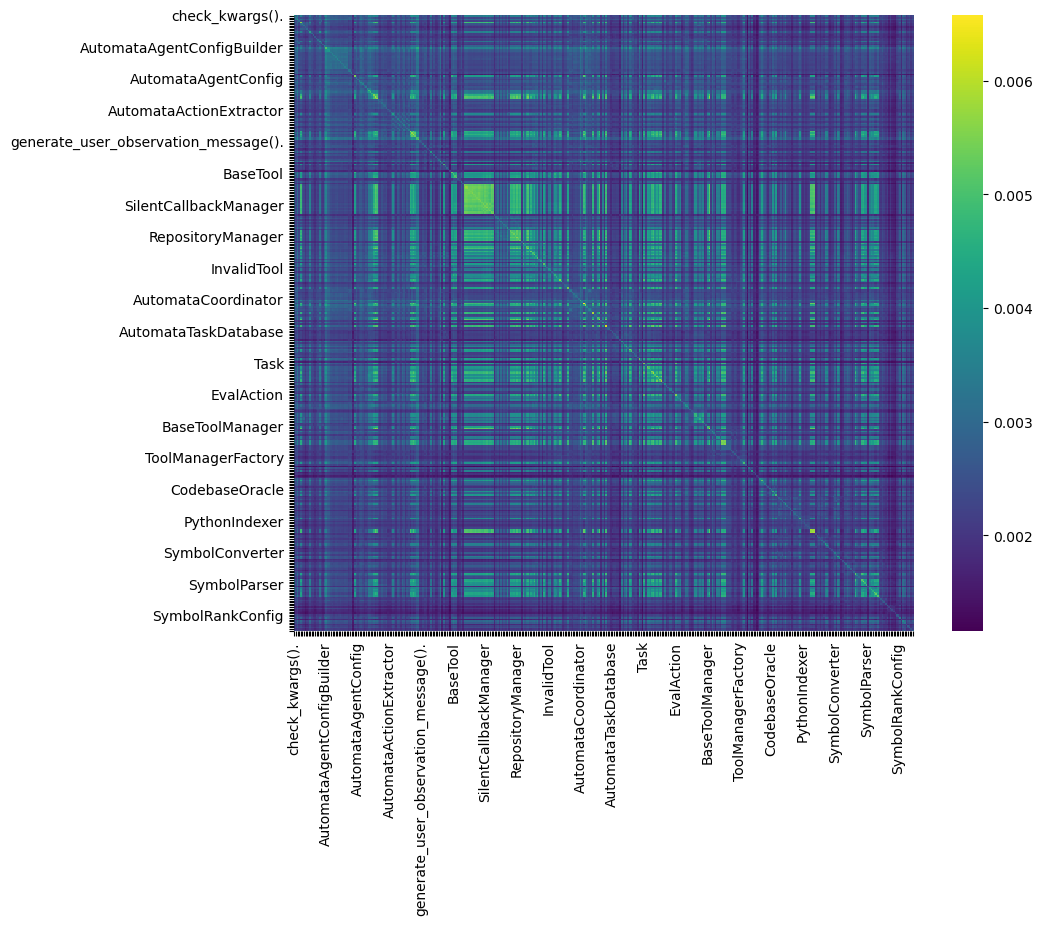

In [11]:
plot_similarity_heatmap(transformed_similarity_df)

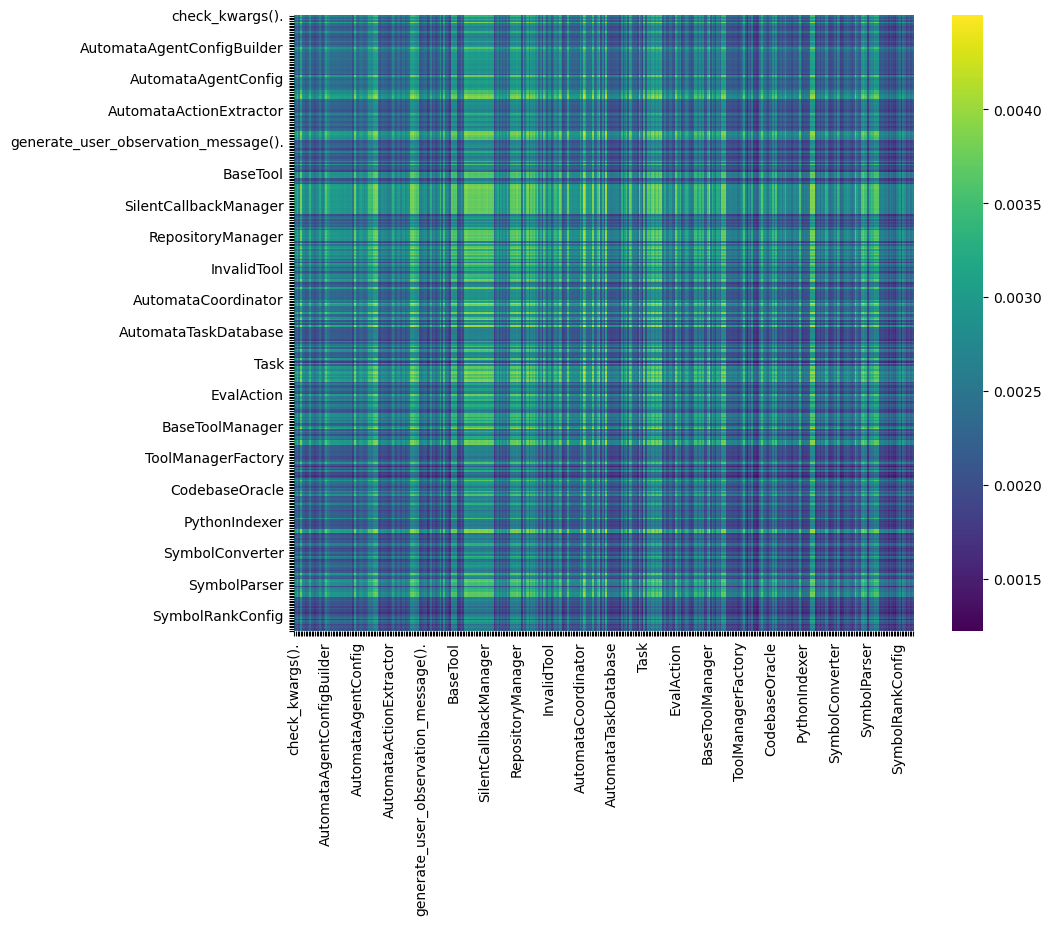

In [12]:
softmax_transformed_similarity_matrix = symbol_similarity.transform_similarity_matrix(softmax_similarity_matrix, "AutomataAgentConfigBuilder")
softmax_transformed_similarity_matrix = pd.DataFrame(softmax_transformed_similarity_matrix)
plot_similarity_heatmap(softmax_transformed_similarity_matrix)